# EDA Básico – Breast Cancer Wisconsin (Diagnostic)
Actividad académica (Semana 03).

Este notebook desarrolla un flujo básico de Análisis Exploratorio de Datos sobre el dataset **Breast Cancer Wisconsin (Diagnostic)**.

**Fuente principal del dataset:** https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

**Objetivos:**
- Cargar y explorar un dataset real.
- Revisar calidad (nulos / duplicados).
- Calcular estadísticas descriptivas.
- Visualizar distribuciones y relaciones simples.
- Identificar correlaciones iniciales.

## 1. Importar Librerías
En esta sección cargamos las librerías fundamentales para el análisis exploratorio (pandas para manipular datos, numpy para operaciones numéricas y seaborn/matplotlib para visualizaciones) y configuramos un estilo visual consistente, además de imprimir un saludo institucional.

In [ ]:
# Celda 1: Importa librerías base para el EDA y configura estilo de gráficos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize']=(10,6)
print('¡Hola UTEM - Ingenieria Civil en Ciencia de Datos!')

¡Hola UTEM - Ingenieria Civil en Ciencia de Datos!


## 2. Descargar y Cargar Dataset
Descargamos (si no existe localmente) el archivo comprimido desde el repositorio UCI, lo extraemos y cargamos el archivo `wdbc.data` con nombres de columnas definidos para poder trabajar de forma legible.

In [ ]:
# Celda 2: Descarga (una sola vez) y carga el dataset con nombres de columnas
import os, zipfile, urllib.request
URL = 'https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip'
ZIP = 'breast_cancer.zip'
DIR = 'breast_cancer_data'
if not os.path.exists(DIR):
    urllib.request.urlretrieve(URL, ZIP)
    with zipfile.ZipFile(ZIP,'r') as z: z.extractall(DIR)
    os.remove(ZIP)
    print('Descarga y extracción completas.')
else:
    print('Usando datos descargados previamente.')
cols = ['id','diagnosis',
 'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
 'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se',
 'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']
path = os.path.join(DIR,'wdbc.data')
df = pd.read_csv(path, header=None, names=cols)
print(f'Filas: {df.shape[0]}  Columnas: {df.shape[1]}')
df.head()

Usando datos descargados previamente.
Filas: 569  Columnas: 32


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Exploración Estructural
Observamos forma (filas/columnas), primeras columnas y tipos de datos para comprender la estructura inicial del DataFrame.

In [ ]:
# Celda 3: Vista de forma general y tipos de datos
print('Shape:', df.shape)
print('Primeras columnas:', df.columns[:6].tolist())
df.info()

Shape: (569, 32)
Primeras columnas: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se       

## 4. Calidad de Datos (Nulos y Duplicados)
Revisamos la presencia de valores nulos y filas duplicadas para evaluar la necesidad de limpieza.

In [ ]:
# Celda 4: Chequeo de nulos y duplicados
print('Valores nulos totales:', df.isna().sum().sum())
print('Duplicados exactos:', df.duplicated().sum())

Valores nulos totales: 0
Duplicados exactos: 0


## 5. Estadísticas Descriptivas y Distribución
Calculamos estadísticas básicas de las variables numéricas y exploramos la distribución de la variable objetivo (diagnosis).

In [ ]:
# Celda 5A: Estadísticas descriptivas de variables numéricas
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Celda 5B: Distribución absoluta y porcentual de la variable objetivo
print('Distribución diagnosis:')
print(df['diagnosis'].value_counts())
print('Porcentajes:')
print((df['diagnosis'].value_counts(normalize=True)*100).round(2))

Distribución diagnosis:
diagnosis
B    357
M    212
Name: count, dtype: int64
Porcentajes:
diagnosis
B    62.74
M    37.26
Name: proportion, dtype: float64


## 6. Visualizaciones Univariadas
Representaciones gráficas simples (pie chart e histogramas) para observar proporciones y distribuciones de variables individuales.

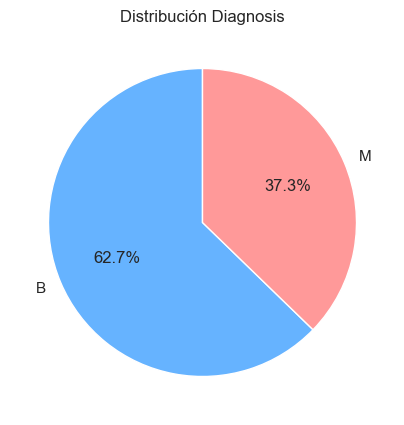

In [ ]:
# Celda 6A: Gráfico de proporción de clases (diagnosis)
counts = df['diagnosis'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribución Diagnosis')
plt.show()

### Interpretación (Distribución de Clases)
El gráfico circular muestra la proporción de casos Benignos (B) vs Malignos (M). Un ligero desbalance a favor de la clase Benigna es común en este dataset (alrededor de ~62% B / ~38% M). Esto implica:
- No hay un desbalance extremo, pero conviene monitorear métricas más allá de accuracy (precision/recall) en modelado.
- La presencia suficiente de la clase minoritaria (Maligna) permite entrenamiento supervisado sin necesidad inmediata de técnicas de re-muestreo.
- La interpretación clínica sugiere que reducir falsos negativos (malignos clasificados como benignos) será más crítico que maximizar aciertos benignos.

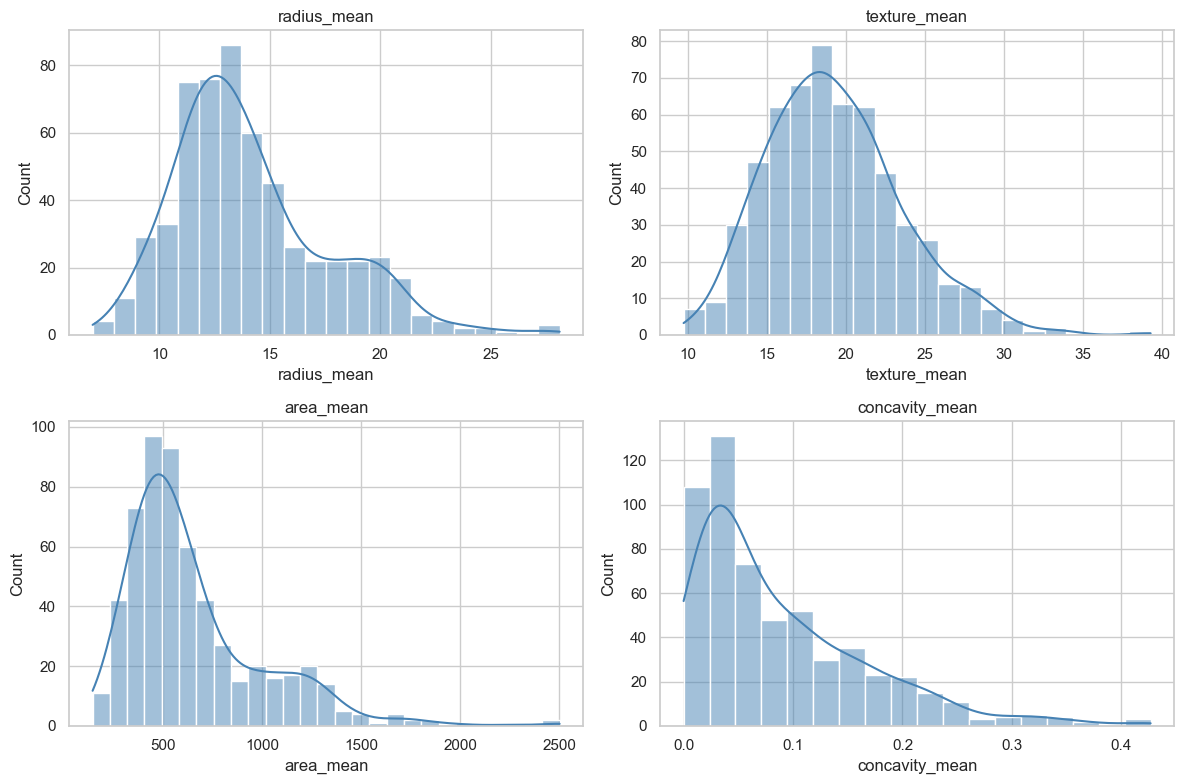

In [11]:
# Celda 6B: Histogramas (con KDE) de algunas variables representativas
import seaborn as sns
features = ['radius_mean','texture_mean','area_mean','concavity_mean']
fig, axes = plt.subplots(2,2, figsize=(12,8))
for ax, col in zip(axes.ravel(), features):
    sns.histplot(df[col], kde=True, ax=ax, color='steelblue')
    ax.set_title(col)
plt.tight_layout(); plt.show()

### Interpretación (Histogramas de Variables Seleccionadas)
- radius_mean: Distribución sesgada a la derecha (cola alta). Tumores malignos suelen asociarse a radios mayores; aunque aquí no se separan por clase, la cola alta sugiere casos potencialmente malignos.
- texture_mean: Más concentrada, con variabilidad moderada. La textura captura irregularidades microscópicas; su dispersión puede ayudar a distinguir sutilmente clases.
- area_mean: Amplio rango y fuerte asimetría; valores altos suelen corresponder a masas más grandes y se correlacionan con malignidad. Observaremos correlación con radius.
- concavity_mean: Muchos valores bajos cercanos a cero y una minoría de valores altos. La concavidad elevada se relaciona con bordes irregulares, característica frecuente en tumores malignos. Esta variable podría ser muy discriminante.


## 7. Visualizaciones Bivariadas
Comparamos variables entre clases y observamos relaciones entre dos medidas importantes para detectar patrones de separación.

C:\Users\ignac\AppData\Local\Temp\ipykernel_21536\4034657088.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y='radius_mean', palette=['#66b3ff','#ff9999'])


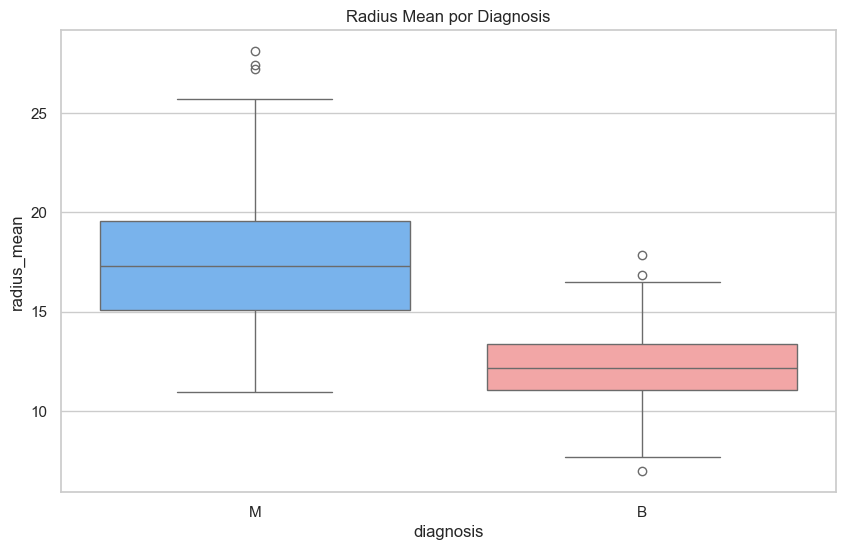

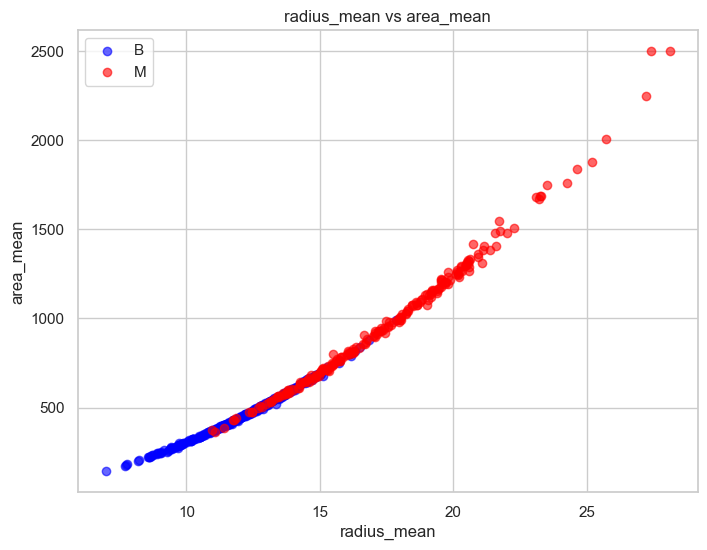

In [ ]:
# Celda 7: Boxplot por clase y dispersión entre dos variables clave
sns.boxplot(data=df, x='diagnosis', y='radius_mean', palette=['#66b3ff','#ff9999'])
plt.title('Radius Mean por Diagnosis'); plt.show()
color_map={'M':'red','B':'blue'}
plt.figure(figsize=(8,6))
for d, sub in df.groupby('diagnosis'):
    plt.scatter(sub['radius_mean'], sub['area_mean'], c=color_map[d], label=d, alpha=0.6)
plt.xlabel('radius_mean'); plt.ylabel('area_mean'); plt.title('radius_mean vs area_mean'); plt.legend(); plt.show()

### Interpretación (Boxplot y Dispersión)
- Boxplot (radius_mean): Se observa que la mediana y el rango intercuartílico de los casos Malignos están desplazados hacia valores mayores respecto a los Benignos. Esto sugiere que el tamaño medio del núcleo celular (radius_mean) es un buen indicador preliminar de malignidad.
- Dispersión (radius_mean vs area_mean): Existe una relación casi monótona creciente; a medida que aumenta el radio medio, el área también crece, lo cual es lógico geométricamente. Los puntos Malignos (en rojo) tienden a concentrarse en la región superior derecha (mayor tamaño), evidenciando un patrón separable que podría aprovecharse en clasificación.
- Posible Multicolinealidad: La alta relación visual indica que radius_mean y area_mean podrían aportar información redundante; más adelante se validará vía correlaciones y selección de features.

Conclusión parcial: Variables de tamaño aportan fuerte señal discriminante, pero se debe evitar incluir muchas características altamente correlacionadas en modelos lineales.

## 8. Correlaciones Básicas
Calculamos correlaciones entre variables de promedio (_mean) para identificar redundancias y luego evaluamos su relación con la variable objetivo codificada.

In [ ]:
# Celda 8: Matriz de correlaciones y correlación con variable objetivo codificada
mean_cols = [c for c in df.columns if c.endswith('_mean')]
corr = df[mean_cols].corr()
plt.figure(figsize=(10,8)); sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.4); plt.title('Matriz Correlación (mean)'); plt.show()
df['diagnosis_num'] = df['diagnosis'].map({'M':1,'B':0})
corr_target = df[mean_cols + ['diagnosis_num']].corr()['diagnosis_num'].drop('diagnosis_num').sort_values(ascending=False)
corr_target.head(8)

### Interpretación (Correlaciones)
- Bloques Altos: radius_mean, perimeter_mean y area_mean muestran correlaciones muy altas entre sí (>0.9 típico), indicando fuerte redundancia (todas miden tamaño de forma relacionada).
- concavity_mean y concave_points_mean suelen presentar correlaciones elevadas con la variable objetivo (al codificar diagnosis), lo cual sugiere su importancia para separar clases.
- smoothness_mean y fractal_dimension_mean tienden a aportar señales más sutiles (correlaciones moderadas/bajas), pudiendo complementar a variables de tamaño.
- Selección Inicial: Para un modelo base podríamos elegir una por grupo redundante (p.ej. radius_mean), más concavity_mean y concave_points_mean.
- Riesgo de Multicolinealidad: Incluir simultáneamente muchas features de tamaño podría inflar varianza en modelos lineales; conviene reducir antes de entrenamiento.

## 9. Conclusiones
Resumen breve sobre limpieza, patrones observados y pasos sugeridos para un modelo posterior (normalización y selección de variables). 

## 10. Referencias
- UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) – https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
- Documentación Pandas: https://pandas.pydata.org/docs/
- Documentación Seaborn: https://seaborn.pydata.org/
- Documentación Matplotlib: https://matplotlib.org/stable/

*INFB6052 – Semana 03*